# Removing URLs and tfidf

* Removing links 
* tfidf to compute the similarities 

## Load data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = '/Users/apple/Documents/GitHub/Argument-Scoring-System/comment_data/comments.csv'
data = pd.read_csv(path)
# new_data = data[np.isfinite(data['mean_evaluation'])]
comments = data['comment_text']
titles = data['issue_title']
scores = data['mean_evaluation']

In [3]:
print (len(comments), len(titles))

2868 2868


## Removing URLs

In [4]:
import re
regex = r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"

In [5]:
# the number of urls in the comment
def urls_num(text):
    urls = re.findall(regex, text)
    return len(urls)

In [6]:
# removing the urls in the comment
def clear_urls(text):
    return re.sub(regex, "",  text)

## tf-idf to compute similarities

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA
import nltk

In [8]:
stopWords = stopwords.words('english')
cx = lambda a, b : round(np.inner(a, b)/(LA.norm(a)*LA.norm(b)), 3)

In [9]:
import math
def tfidf_sim(text, title):
    text = clear_urls(text)
    sents = nltk.sent_tokenize(text)
    
    s = ""
    for item in sents:
        if len(item) > len(s):
            s = item
    
    vectorizer = CountVectorizer(stop_words = stopWords)
    transformer = TfidfTransformer()
    
#     just compute the similarity of the first sent
#     trainVectorizerArray = vectorizer.fit_transform([s]).toarray()
#     testVectorizerArray = vectorizer.transform([title]).toarray()
    trainVectorizerArray = vectorizer.fit_transform([title]).toarray()
    testVectorizerArray = vectorizer.transform([s]).toarray()
    
    cosine = cx(trainVectorizerArray[0], testVectorizerArray[0])
    if math.isnan(cosine):
        return 0
#         print (sents[0])
#         print (title)
#         print ('---')
    return cosine 

In [10]:
print (tfidf_sim(comments[0], titles[0]))

0.816


## storing the data into pickle

In [11]:
# building a dictionary to store the similarities

In [12]:
tfidf_simi = []
for i in range(len(comments)):
    try: 
        tfidf_simi.append(tfidf_sim(comments[i], titles[i])) 
    except (ValueError, IndexError):
#         print (comments[i])
#         print (titles[i])
#         print ("-------")
        tfidf_simi.append(0)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [18]:
tfidf_data = pd.DataFrame({"similarity": tfidf_simi,
                        "score": scores
                              })

In [19]:
tfidf_data = tfidf_data[np.isfinite(tfidf_data['score'])]

In [20]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [21]:
print (tfidf_data.shape)

(2562, 2)


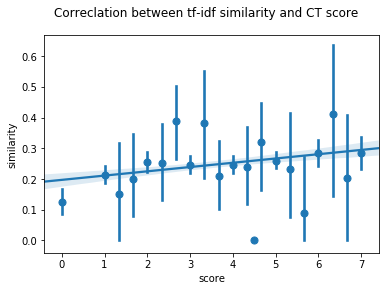

In [29]:
fig = plt.figure()
fig.suptitle('Correclation between tf-idf similarity and CT score')
sns.regplot(x="score", y="similarity", data=tfidf_data , x_estimator=np.mean)
plt.show()

In [30]:
fig.savefig('tfidf.png', dpi=fig.dpi)

In [31]:
num_links = [urls_num(item) for item in comments]

In [32]:
print (len(comments), len(num_links))

2868 2868


In [33]:
urls_data = pd.DataFrame({"number": num_links,
                        "score": scores
                              })

In [34]:
urls_data = urls_data[np.isfinite(urls_data['score'])]

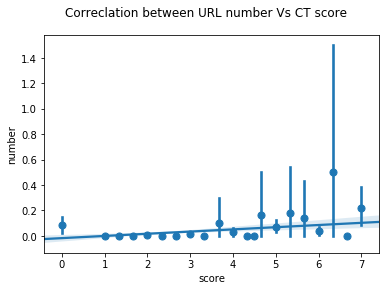

In [37]:
fig = plt.figure()
fig.suptitle('Correclation between URL number Vs CT score')
sns.regplot(x="score", y="number", data=urls_data , x_estimator=np.mean)
plt.show()

In [38]:
fig.savefig('url.png', dpi=fig.dpi)

In [23]:
url_sim_dic = {}
for i in range(len(tfidf_simi)):
    url_sim_dic[comments[i]] = [tfidf_simi[i], num_links[i]]

In [24]:
import pickle
with open('url_sim_dic.pickle', 'wb') as handle:
    pickle.dump(url_sim_dic, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Visualize number for each issue

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
score_num = {}
num = [0,1,2,3,4,5,6,7]
for item in scores:
    if item in score_num:
        score_num[item] += 1
    elif item in num :
        score_num[item] = 1
    else:
        pass

In [33]:
print (score_num)

{0.0: 120, 1.0: 411, 2.0: 279, 3.0: 412, 4.0: 398, 5.0: 460, 6.0: 192, 7.0: 134}


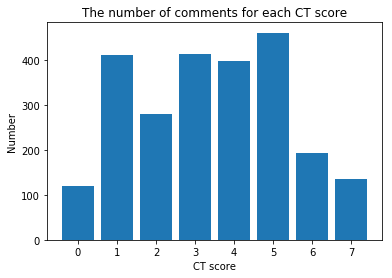

In [41]:
fig = plt.figure()

plt.xlabel('CT score')
plt.ylabel('Number')
plt.title('The number of comments for each CT score')
plt.bar(list(score_num.keys()), score_num.values())
plt.show()

In [42]:
fig.savefig("score_num.png", dpi=fig.dpi)